# Project name:  Netflix/Binge-Watching Pattern Analysis



## Problem statement:
#### Use viewer log data (time spent, genres watched, binge frequency) to analyze binge-watching behavior and content preferences. Recommend features or content categories for user retention.

# About the dataset(Netflix Movies and TV Shows)

**show_id:** -> Unique ID for each show/movie

**type:** -> Whether the entry is a Movie or TV Show

**title:** -> Name of the title

**director:** ->Name of the director (can be null)

**cast:** ->List of actors involved (can be null)

**country:** ->Country of origin (can be null)

**date_added:** ->Date the title was added to Netflix

**release_year:** ->Year the title was originally released

**rating:** ->Age rating (e.g., TV-MA, PG-13)

**duration:** ->Length of movie or number of seasons (text field)

**listed_in:** ->Genres/categories the title belongs to

**description:** ->Brief summary of the title

In [6]:
#pip install mysql-connector-python

In [7]:
# Step 1: Import Libraries
import numpy as np 
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
# Step 2: Load Dataset
file_path = 'netflix_titles.csv'  
df = pd.read_csv(file_path)
print("Dataset Loaded:", df.shape)

Dataset Loaded: (8807, 12)


In [9]:
# Step 3: MySQL Connection Setup
user = 'root'
password = ''
host = 'localhost'
database = 'netflix_project'

In [10]:
# Create SQLAlchemy engine for easy insert
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}', echo=False)

In [11]:
# Step 4: Create Table in MySQL

In [12]:
# Step 5: Load Data into SQL
df.to_sql(name='netflix_titles', con=engine, if_exists='replace', index=False)
print("Data inserted into MySQL table: netflix_titles")

Data inserted into MySQL table: netflix_titles


In [13]:
# Step 6: Initial SQL Data Profiling (via Python)
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)
cursor = conn.cursor()

In [14]:
# Total Records
cursor.execute("SELECT COUNT(*) FROM netflix_titles;")
print("Total Records:", cursor.fetchone()[0])

Total Records: 8807


In [15]:
# Missing Director Values
cursor.execute("SELECT COUNT(*) FROM netflix_titles WHERE director IS NULL OR director = '';")
print("Missing Director:", cursor.fetchone()[0])

Missing Director: 2634


In [16]:
# Distinct Content Types
cursor.execute("SELECT DISTINCT type FROM netflix_titles;")
print("Content Types:", cursor.fetchall())

Content Types: [('Movie',), ('TV Show',)]


In [17]:
# Step 7: Cleaning in Python (Pandas)
df.dropna(subset=['title', 'type', 'release_year'], inplace=True)

In [18]:
# Convert date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [19]:
# Split duration into value and unit
df[['duration_int', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')
df['duration_unit'] = df['duration_unit'].str.lower()

In [20]:
df['duration'].head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [21]:
print(df[['duration', 'duration_int', 'duration_unit']].head(5))

    duration  duration_int duration_unit
0     90 min          90.0           min
1  2 Seasons           2.0       seasons
2   1 Season           1.0        season
3   1 Season           1.0        season
4  2 Seasons           2.0       seasons


In [22]:
# Step 8: Push Cleaned Data to New SQL Table

df.to_sql(name='netflix_titles_clean', con=engine, if_exists='replace', index=False)
print("Cleaned data uploaded to: netflix_titles_clean")

Cleaned data uploaded to: netflix_titles_clean


In [23]:
df.to_sql(name='netflix_titles_clean', con=engine, if_exists='replace', index=False)

8807

In [24]:
# CLOSE old cursor and connection after table replacement
cursor.close()
conn.close()

# RECONNECT to MySQL fresh
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)
cursor = conn.cursor()

# NOW run your query
cursor.execute("SELECT COUNT(*) FROM netflix_titles_clean;")
print("Cleaned Table Records:", cursor.fetchone()[0])


Cleaned Table Records: 8807


In [25]:
# Step 9: Validate Cleaned Data
# Close the old cursor and reopen it
cursor.close()
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM netflix_titles_clean;")
print("Cleaned Table Records:", cursor.fetchone()[0])

Cleaned Table Records: 8807


In [26]:
# Step 10: Export Clean Dataset for Visualization
df.to_csv('clean_netflix_titles.csv', index=False)
print("Clean dataset exported as 'clean_netflix_titles.csv'")

Clean dataset exported as 'clean_netflix_titles.csv'


In [65]:
clean_df = pd.read_csv("clean_netflix_titles.csv")
clean_df.shape

(8807, 14)

In [66]:
clean_df.shape

(8807, 14)

In [67]:
clean_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_int', 'duration_unit'],
      dtype='object')

# EDA and Visualization for Netflix Dataset

In [ ]:
print(" Dataset Info:")
print(df.info())

In [31]:
# Missing Values 
print("\n Missing Values:")
clean_df.isnull().sum()


 Missing Values:


show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_year        0
rating              4
duration            3
listed_in           0
description         0
duration_int        3
duration_unit       3
dtype: int64

In [32]:
# Describe Numeric Columns
print("\n Numeric Summary:")
clean_df.describe()


 Numeric Summary:


,release_year,duration_int
count,8807.000000,8804.000000
mean,2014.180198,69.846888
std,8.819312,50.814828
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [33]:
# Describe All Columns (Including Categorical)
print("\n Full Summary (Categorical + Numeric):")
clean_df.describe(include='all')


 Full Summary (Categorical + Numeric):


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_int,duration_unit
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807,8804.000000,8804
unique,8807,2,8807,4528,7692,748,1714,NaN,17,220,514,8775,NaN,3
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2020-01-01,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope...",NaN,min
freq,1,6131,1,19,19,2818,110,NaN,3207,1793,362,4,NaN,6128
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN,69.846888,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN,50.814828,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,2.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,88.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,106.000000,NaN


In [68]:
# Value Counts for Key Categorical Fields
print("\n Value Counts:")
clean_df['type'].value_counts()


 Value Counts:


Movie      6131
TV Show    2676
Name: type, dtype: int64

In [70]:
print("\n Value Counts:")
clean_df['rating'].value_counts().head(10)


 Value Counts:


TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

In [71]:
print("\n Value Counts:")
clean_df['country'].value_counts().head(5)


 Value Counts:


United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

### Step 2: Univariate Analysis
Objective:
Analyze one feature at a time to understand its distribution, frequency, and common values using histograms, bar plots, and count plots.

In [43]:
# Set plot style
sns.set(style="whitegrid")

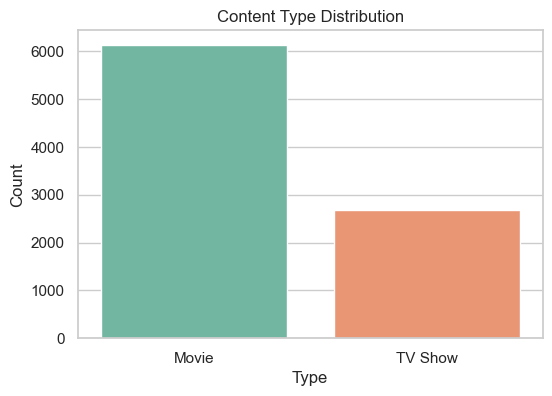

In [44]:
# 1. Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=clean_df, x='type', palette='Set2')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

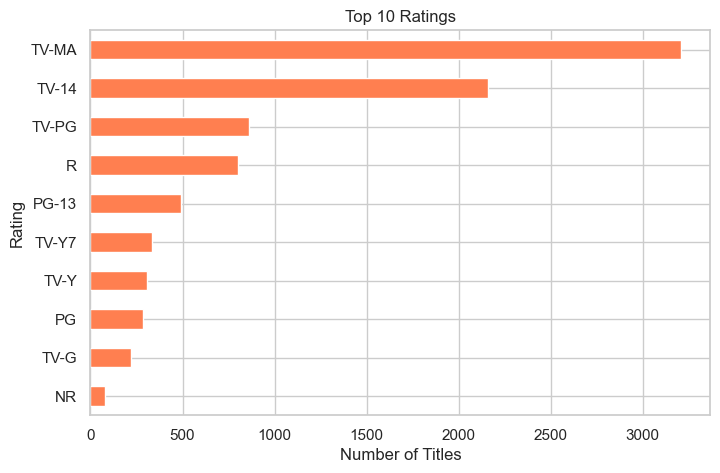

In [45]:
# 2. Top 10 Ratings
plt.figure(figsize=(8, 5))
clean_df['rating'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title('Top 10 Ratings')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.gca().invert_yaxis()
plt.show()

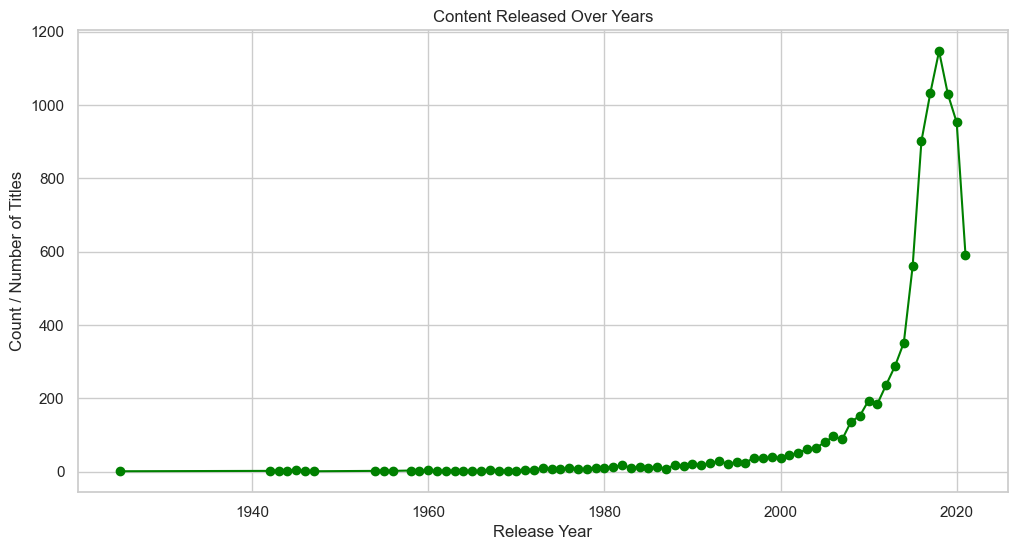

In [46]:
# 3. Release Year Distribution
plt.figure(figsize=(12, 6))
clean_df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Content Released Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count / Number of Titles')
plt.grid(True)
plt.show()

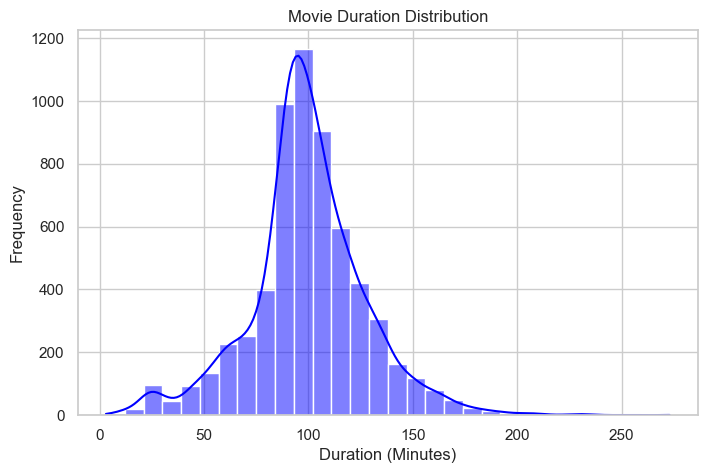

In [47]:
# 4. Duration Histogram (Movies only)
movies = clean_df[clean_df['type'] == 'Movie']
plt.figure(figsize=(8, 5))
sns.histplot(data=movies[movies['duration_int'] < 300], x='duration_int', bins=30, kde=True, color='blue')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

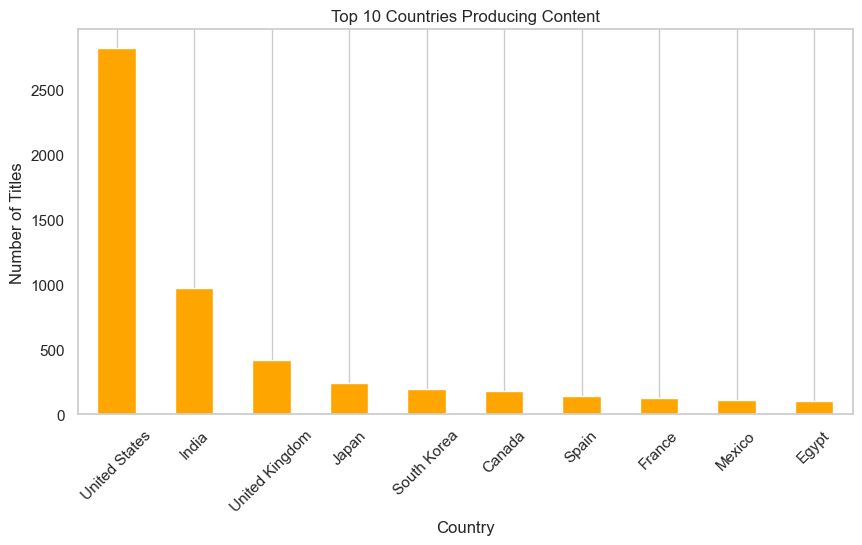

In [48]:
# 5. Top 10 Countries 
plt.figure(figsize=(10, 5))
clean_df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries Producing Content')
plt.ylabel('Number of Titles')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Step 3: Bivariate/Multivariate Analysis
Objective:
To explore relationships between two or more variables and uncover patterns that may help in understanding binge-watching behavior and content trends

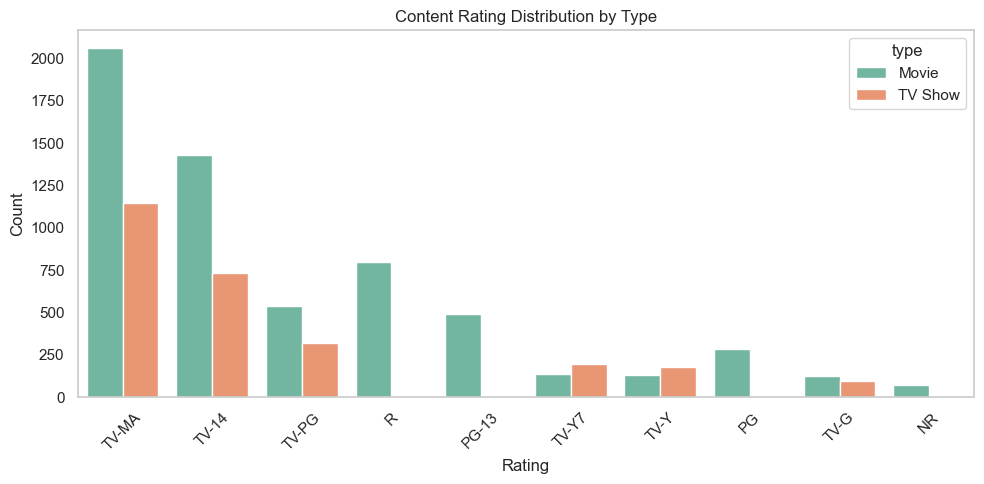

In [49]:
# 1. Type vs Rating Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=clean_df, x='rating', hue='type', order=clean_df['rating'].value_counts().index[:10], palette='Set2')
plt.title('Content Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

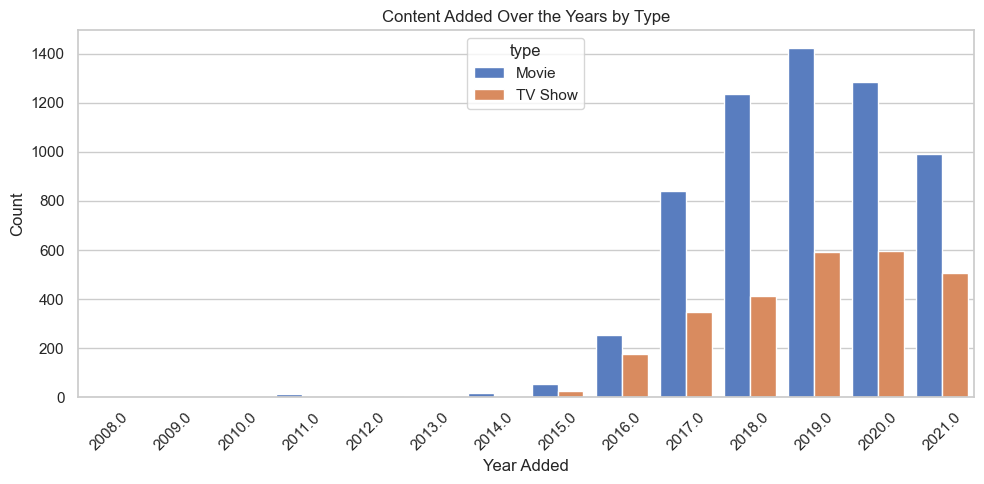

In [50]:
# 2. Content Added Over Time
clean_df['date_added'] = pd.to_datetime(clean_df['date_added'], errors='coerce')
clean_df['year_added'] = clean_df['date_added'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(data=clean_df[clean_df['year_added'].notna()], x='year_added', hue='type', palette='muted')
plt.title('Content Added Over the Years by Type')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

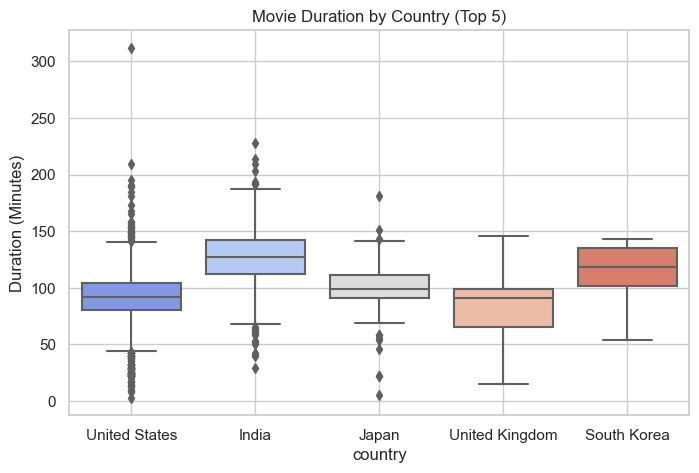

In [51]:
# 3. Average Duration by Country (Top 5)
top_countries = clean_df['country'].value_counts().head(5).index
filtered = clean_df[(clean_df['country'].isin(top_countries)) & (clean_df['type'] == 'Movie')]

plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered, x='country', y='duration_int', palette='coolwarm')
plt.title('Movie Duration by Country (Top 5)')
plt.ylabel('Duration (Minutes)')
plt.grid(True)
plt.show()

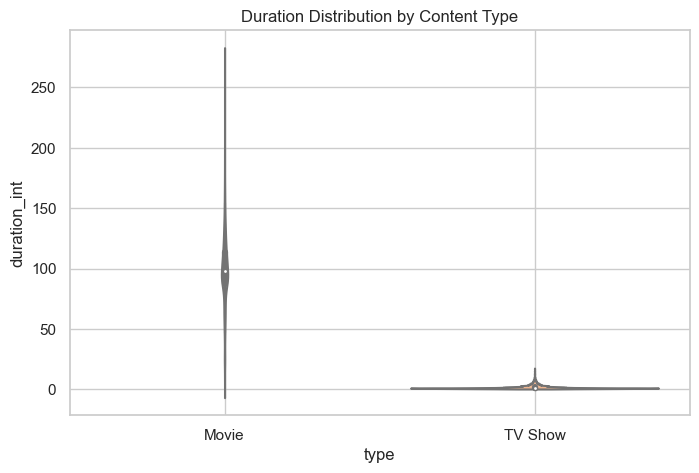

In [53]:
# 4. Duration vs Type (Swarm Plot / Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(data=df[df['duration_int'] < 300], x='type', y='duration_int', palette='pastel')
plt.title('Duration Distribution by Content Type')
plt.grid(True)
plt.show()

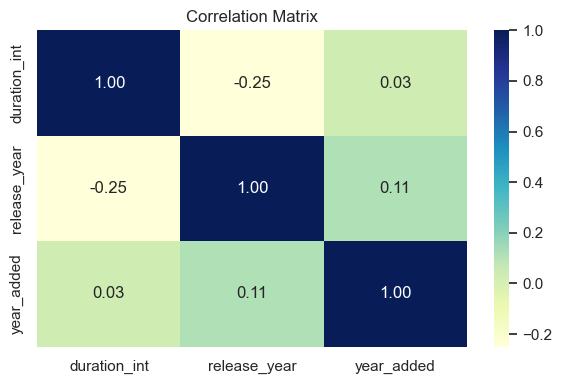

In [101]:
# 5. Correlation Matrix (Numerical)
# Only includes numeric columns (duration_int, year_added)
corr_df = clean_df[['duration_int', 'release_year', 'year_added']].dropna()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [54]:
# Enhancement
df.groupby(['type', 'rating']).size().unstack().fillna(0)

rating,66 min,74 min,84 min,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
type,,,,,,,,,,,,,,,,,
Movie,1.0,1.0,1.0,41.0,3.0,75.0,287.0,490.0,797.0,1427.0,126.0,2062.0,540.0,131.0,139.0,5.0,3.0
TV Show,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,733.0,94.0,1145.0,323.0,176.0,195.0,1.0,0.0


### Step 4: Outlier & Anomaly Detection
Objective:
To identify and possibly handle extreme values or unusual entries that can skew analysis results — especially for numeric fields like duration.

### We’ll Focus On:
duration_int (e.g., extremely long movie durations)

release_year (e.g., ancient or future dates)

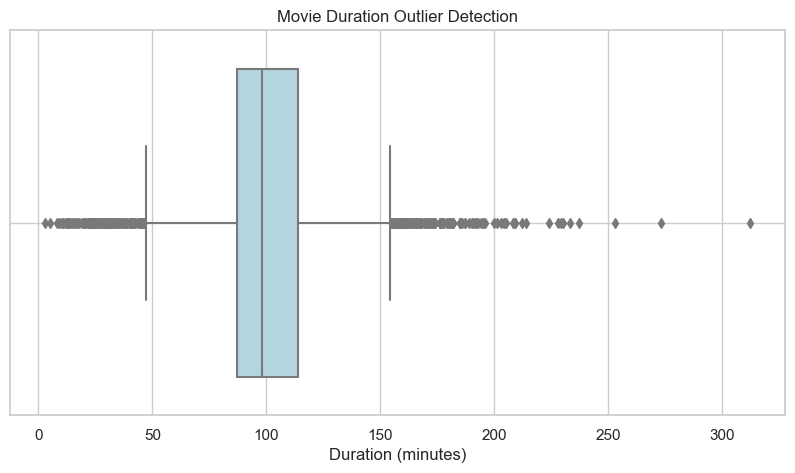

In [111]:
# 1. Boxplot: Duration of Movies
movies = clean_df[clean_df['type'] == 'Movie']

plt.figure(figsize=(10, 5))
sns.boxplot(data=movies[movies['duration_int'] < 500], x='duration_int', color='lightblue')
plt.title('Movie Duration Outlier Detection')
plt.xlabel('Duration (minutes)')
plt.grid(True)
plt.show()

In [113]:
# 2. View Outliers (Duration > 300 mins)
outliers_duration = movies[movies['duration_int'] > 300]
print("Movies with unusually long duration (> 300 mins):")
outliers_duration[['title', 'duration_int', 'country', 'release_year']]

Movies with unusually long duration (> 300 mins):


,title,duration_int,country,release_year
4253,Black Mirror: Bandersnatch,312.0,United States,2018


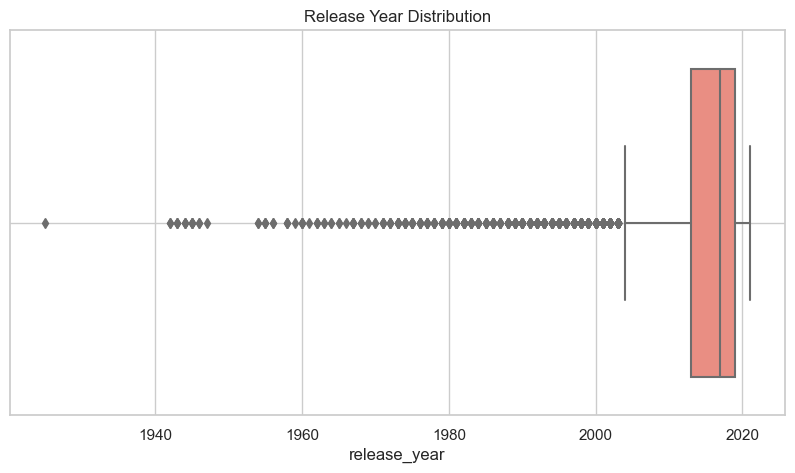

In [114]:
# 3. Boxplot: Release Year Outlier Check
plt.figure(figsize=(10, 5))
sns.boxplot(data=clean_df, x='release_year', color='salmon')
plt.title('Release Year Distribution')
plt.grid(True)
plt.show()

In [58]:
# View unusually old/new content
early_years = df[df['release_year'] < 1950]
future_years = df[df['release_year'] > 2025]

print("\n Content with unusually early release years < 1950:")
early_years[['title', 'release_year', 'country']]


 Content with unusually early release years < 1950:


,title,release_year,country
1331,Five Came Back: The Reference Films,1945,United States
4250,Pioneers: First Women Filmmakers*,1925,NaN
7219,Know Your Enemy - Japan,1945,United States
7294,Let There Be Light,1946,United States
7575,Nazi Concentration Camps,1945,United States
7743,Pioneers of African-American Cinema,1946,United States
7790,Prelude to War,1942,United States
7930,San Pietro,1945,United States
8205,The Battle of Midway,1942,United States
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944,United States


In [59]:
print("\n Content with future release years > 2025:")
future_years[['title', 'release_year', 'country']]


 Content with future release years > 2025:


,title,release_year,country


In [61]:
# 4. Remove Outliers
# You could filter them out:
df_no_outliers = df[(df['duration_int'] <= 300) & (df['release_year'].between(1950, 2025))]

print(f"\n Dataset after removing outliers: {df_no_outliers.shape}")


 Dataset after removing outliers: (8787, 14)


In [63]:
# 5. Export Clean Dataset for Power BI
df_no_outliers = "clean_netflix_for_powerbi.csv"
df.to_csv(df_no_outliers, index=False)
print(f"\n Data exported for Power BI: {df_no_outliers}")


 Data exported for Power BI: clean_netflix_for_powerbi.csv
